In [1]:
# 0-low
# 1-medium
# 2-highcost
# 4-very high cost 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [5]:
data = pd.read_csv("mobile_prices.csv")

In [6]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<AxesSubplot: >

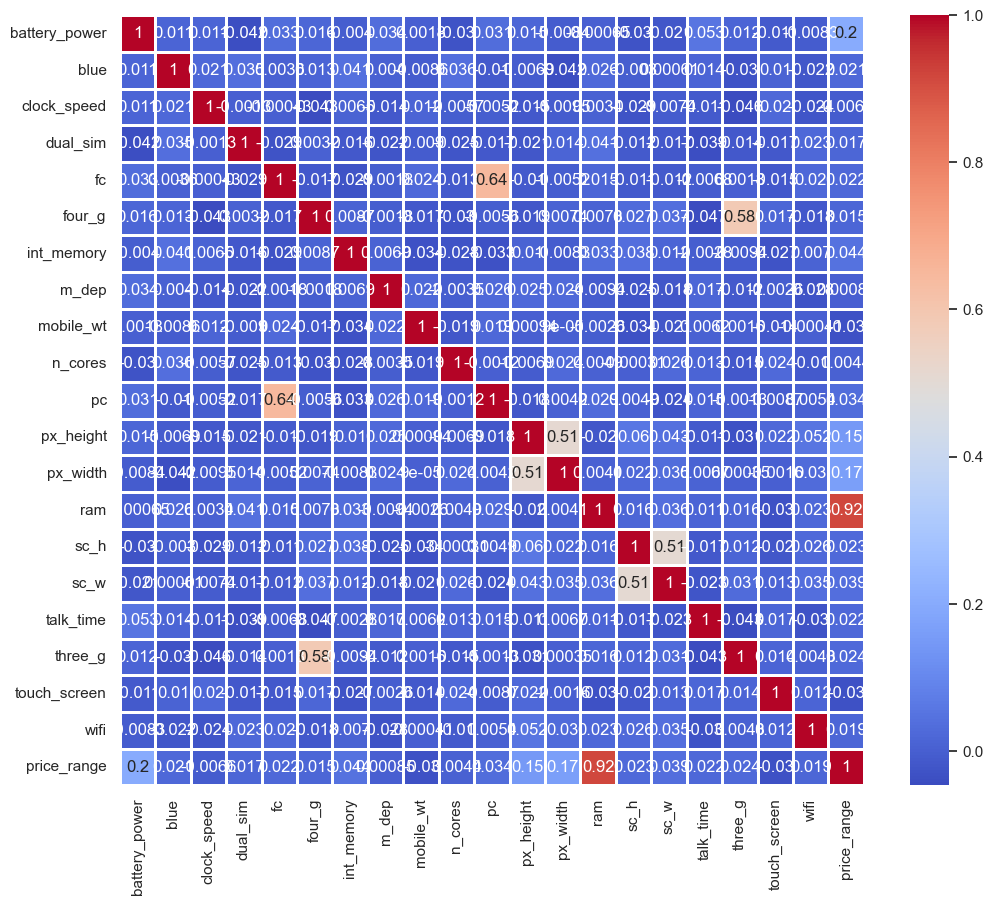

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm',linecolor ='white',linewidths=1)

# DATA PREPARATION

In [8]:
# Since no categorical data needs no transformation

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
x = StandardScaler().fit_transform(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.20,random_state =0)

# MODEL TRAINING 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [21]:
lreg = LogisticRegression()
lreg.fit(xtrain,ytrain)

LogisticRegression()

In [22]:
y_pred = lreg.predict(xtest)

In [24]:
accuracy = accuracy_score(ytest,y_pred)* 100
print("Accuracy of the Logistic Regression Model :",accuracy)

Accuracy of the Logistic Regression Model : 95.5


In [25]:
y_pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 2, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [27]:
# no. of mobile phone classified for each price range 
(unique,counts)=np.unique(y_pred,return_counts =True)
price_range = np.asarray((unique,counts)).T


In [28]:
price_range

array([[  0,  95],
       [  1,  90],
       [  2,  97],
       [  3, 118]], dtype=int64)

In [29]:
import pickle
# filename = 'Mobile_price_prediction_mlmodel'

In [31]:
with open('Mobile_price_prediction.pkl','wb') as files :
    pickle.dump(y_pred,files)
with open('Mobile_price_prediction.pkl','rb') as f:
    lr = pickle.load(f)